<a href="https://colab.research.google.com/github/trashpanda900/Data-Science/blob/main/TeddMcBrU5proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm
import graphviz as gv

from scipy.interpolate import PchipInterpolator

You need to submit a .ipynb file with the first four letters of one first name, the first four letters of one last name, and U5proj.

Ex.

A student named Avy Aguacate Avocado Palta will submit a file named "Avy_AvocU5proj.ipynb", since she normally just goes by Avy, and, when pressed, reports Avocado as her last name. The " _ " after "Avy" serves as the fourth "letter" in her first name.

Ex2.

Army Armadillo will submit a file named "ArmyArmaU5proj.ipynb"

# Unit 5 Project: Making a Generalized Linear Model (1 predictor)

**Task**:

Two parts:

1. Propose a data set that's compatible with a generalized linear model structure built with pymc. I must approve your submission before you move on to part 2.

2. Create, analyze, and present a generalized linear model using pymc within the colab environment, on a data set of your choice.



Guidlines:

- You are allowed to copy and paste any code from the notes, including my answer key (AK), without any reference or citations. Same goes for the course textbook, BAP3.

- This is an individual project. It is fine if you model the same process as a peer, but your raw data **must** be substantially different. "Substantially different" means that I, your instructor, arbitrarily think your data sets are different enough.

- Do not look at other student's code/jupyter notebooks. Copying, or copying and pasting, other students code will result in a failing grade. Also, I will tell all the other teachers I know that you cheated.

- If you want to know what another student did, ask them--any verbal communication about a project is allowed and encouraged. If you want to see a graphic they made, ask them to sketch a picture of it for you by hand.

- Any handwritten communication is also allowed and encouraged, so long as all parties are in the same physical location together. Example: you may sketch out a piece of code while verbally explaining to someone what you did. Do NOT: hand write the code for your entire project, take a picture, and send it to everyone in the course.

- If you use someone's code from outside this course (like from the internet, an AI, or your parent), you must ask me if it is ok, and you must cite them in your work. I don't care all they did was to click your space bar one more time: you tell me, and you cite their contribution. You don't need to tell me about or cite verbal or handwritten communication though.

- You may use a more complicated model--like something from further along in the course--IF I give you permission.

- If you are unsure whether or not something is ok or allowed: ASK BEFORE YOU DO IT.

Faliure to adhere to these guidlines will result in a failing grade.

Tips:

- Try to pick something that you care about, have knowledge of, experience with, or that you find interesting/cool.

- Gather data *before* picking a likelihood.

-  Use your best idea now; maybe you can look at the context you used in the previous project, and gather different data from it.

- Linear models are generalized linear models. This is not a competition to come up with the most complicated heirearchical glm. **Find a data set that interests you, and apply the simplest model that captures the patterns in the data.**

- Comment heavily, and explain your steps and thought process with text blocks. This is not only requried, it'll also help you understand what you're doing and what you want to do.

- Want an example? The Unit5NotesAK *is* your example! You are expected to be somewhere between a half and three-quarters as detailed--but more is always welcome.

- Its ok to pick a data set for which you don't qute understand the context--so long as you think the context is cool.


For this project, I am trying to find the correlation, or lack thereof, between the assist precentage(AST%) and the salary a player has. AST% is the number of field goals a player assisted on / the number of field goals made by teamates while they were on the court, and represents a player's ability create scoring opportunities. I chose this stat not only because it is considered valuable and may yield a higher salary, but also because it's a stat that doesn't always increase with total minutes, since its adjusted for playing type.

In [ ]:
url_basketball = 'https://raw.githubusercontent.com/trashpanda900/Data-Science/refs/heads/main/NBA%20Stats%20-%20Sheet1%20(1).csv'
basketball = pd.read_csv(url_basketball)

In [ ]:
basketball

,Player,Salary,AST
0,Stephen Curry,48070014,30.0
1,John Wall,47345760,35.3
2,Russell Westbrook,47080179,38.6
3,LeBron James,44474988,33.5
4,Kevin Durant,44119845,24.5
...,...,...,...
95,Jordan Clarkson,13340000,20.9
96,Gary Harris,13000000,6.9
97,Kyle Kuzma,13000000,16.5
98,Josh Hart,12960000,16.1


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Salary'].plot(kind='hist', bins=20, title='Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['AST'].plot(kind='hist', bins=20, title='AST')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Salary', y='AST', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Salary']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Salary')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['AST']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('AST')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Salary'].plot(kind='line', figsize=(8, 4), title='Salary')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['AST'].plot(kind='line', figsize=(8, 4), title='AST')
plt.gca().spines[['top', 'right']].set_visible(False)

First I plotted the data points on a scattersplot. Initially I do not see much correlation.

<Axes: xlabel='AST', ylabel='Salary'>

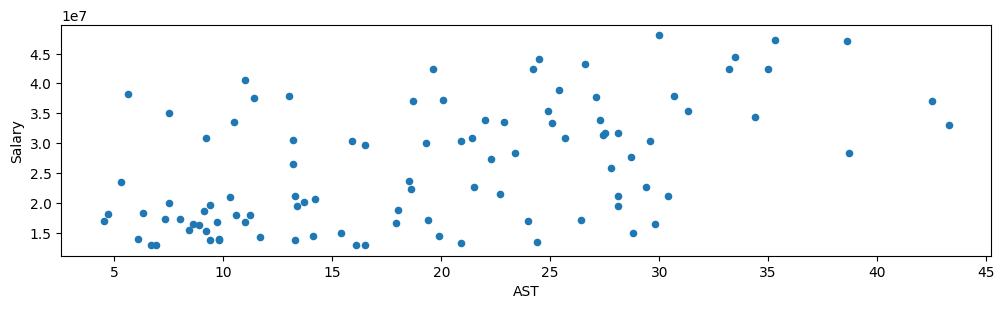

In [ ]:
basketball.plot(x="AST", y="Salary", figsize=(12, 3), kind="scatter")

Took me a while to realize that all my values needed to be way larger since the 1.5-4.5 on the graph was actually in the ten millions.

In [ ]:
#lb stands for linear bike
with pm.Model() as model_bb:

    #priors for the linear part of our model
    α = pm.Normal("α", mu=2*10000000, sigma=10000000)
    β = pm.Normal("β", mu=(0.5/5)*10000000, sigma=10000)

    #this is the linear part of our model
    μ = pm.Deterministic("μ", α + β * basketball.AST)

    #prior for the standard deviation of our likelihood
    #Cauchy is a T dist with nu = 1
    σ = pm.HalfCauchy("σ", 10)

    #likelihood
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed=basketball.Salary)

    #inference data object
    idata_bb = pm.sample()

array([<Axes: title={'center': 'α'}>, <Axes: title={'center': 'β'}>,
       <Axes: title={'center': 'σ'}>], dtype=object)

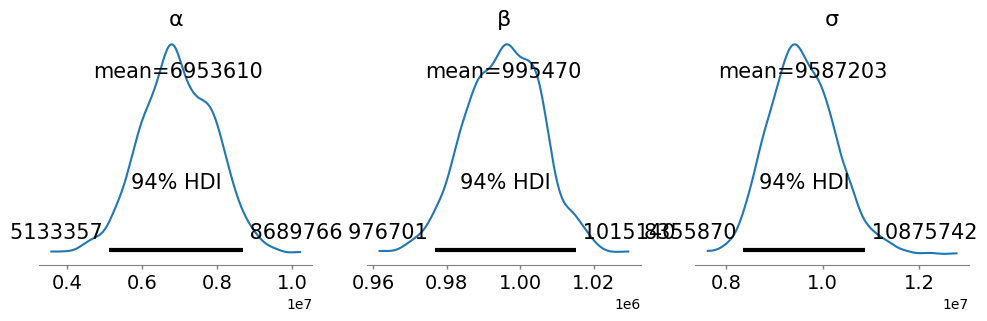

In [ ]:
az.plot_posterior(idata_bb, var_names=["~μ"], figsize=(12, 3))

Text(0, 0.5, 'Salary')

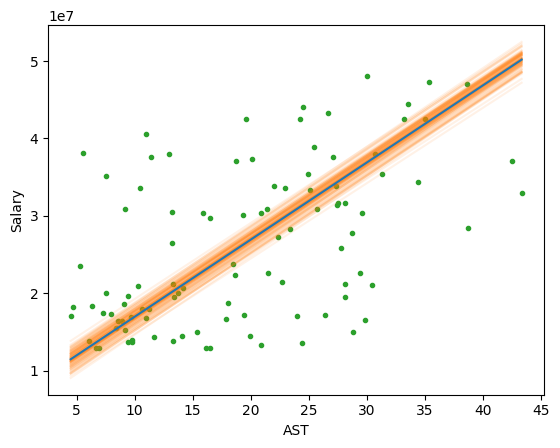

In [ ]:
#grabs 100 posterior samples
posterior = az.extract(idata_bb, num_samples=100)

# grabbing x values for graphing.
x_plot = xr.DataArray(
    np.linspace(basketball.AST.min(), basketball.AST.max(), 50),
    dims="plot_id"
    )

# this creates the expected line, the path we predict temperature and
#rented bike count deviates from
mean_line = posterior["α"].mean() + posterior["β"].mean() * x_plot

#These are a 50 lines that our model came up with
lines = posterior["α"] + posterior["β"] * x_plot

#set up plot
_, ax = plt.subplots()

#plots 50 other lines our model came up with.
ax.plot(x_plot, lines.T, c="C1", alpha=0.1, label="lines")

#plots the mean line
ax.plot(x_plot, mean_line, c="C0", label="mean line")

#plot the raw data
ax.plot(basketball.AST, basketball.Salary, "C2.", zorder=-3)

#label axes and create legend
ax.set_xlabel("AST")
ax.set_ylabel("Salary")

In [ ]:
pm.sample_posterior_predictive(idata_bb, model=model_bb,  extend_inferencedata=True)

Text(0, 0.5, 'Salary')

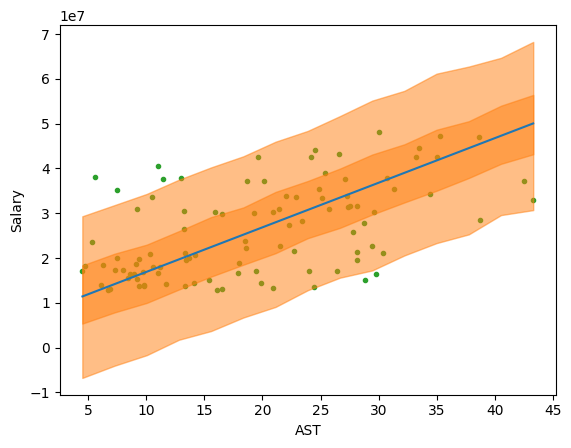

In [ ]:
#plots the posterior predictive distribution

#grabs the expected line, or line of best fit formula
mean_line = idata_bb.posterior["μ"].mean(("chain", "draw"))

#creates some x values to run through our line formula
ASTs = np.random.normal(basketball.AST.values, 0.01)
idx = np.argsort(ASTs)
x = np.linspace(ASTs.min(), ASTs.max(), 15)

#grabs the 94% HDI and 50% HDI
y_pred_q = idata_bb.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
#sets up the HDIs for graphing
y_hat_bounds = iter(
    [
        PchipInterpolator(ASTs[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)

#plots raw data and our line of best fit
_, ax = plt.subplots()
ax.plot(basketball.AST, basketball.Salary, "C2.", zorder=-3)
ax.plot(basketball.AST[idx], mean_line[idx], c="C0")


#graphs the 94% and 50% HDIs
for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)

#labels
ax.set_xlabel("AST")
ax.set_ylabel("Salary")

Posterior predictive check looks pretty bad, not only does the normal likelihood not match the data, but the pp displays negative values.

<Axes: xlabel='y_pred'>

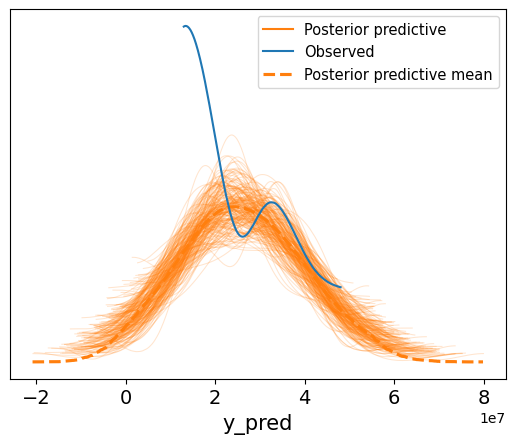

In [ ]:
#posterior predictive check
az.plot_ppc(idata_bb, num_pp_samples=200, colors=["C1", "C0", "C1"])

After looking at the violin plot an posterior predictive, I decided to use a Negative Binomial likelihood instead.

<Axes: ylabel='Salary'>

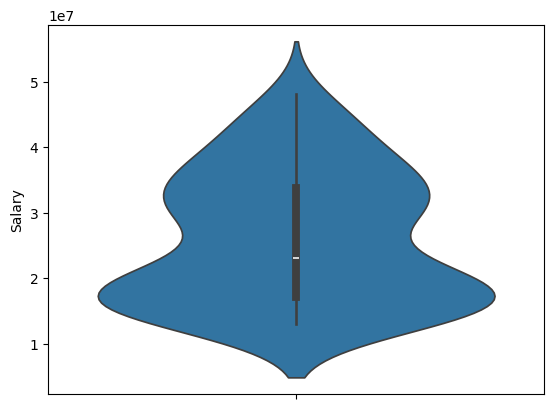

In [ ]:
sns.violinplot(basketball.Salary)

In [ ]:
#lb stands for linear bike
with pm.Model() as model_bb2:

    #priors for the linear part of our model
    α = pm.Normal("α", mu=2*10000000, sigma=10000000)
    β = pm.Normal("β", mu=(0.5/5)*10000000, sigma=10000)

    #this is the linear part of our model
    μ = pm.Deterministic("μ", α + β * basketball.AST)

    #prior for the likelihood's standard deviation
    σ = pm.HalfNormal("σ", 10)

    #likelihood
    y_pred = pm.NegativeBinomial("y_pred", mu=μ, alpha=σ, observed=basketball.Salary)

    idata_bb2 = pm.sample()

In [ ]:
pm.sample_posterior_predictive(idata_bb2, model = model_bb2, extend_inferencedata=True)

Doesn't look great, but lets look at the linear postieror predicitive distribution.

<Axes: xlabel='y_pred'>

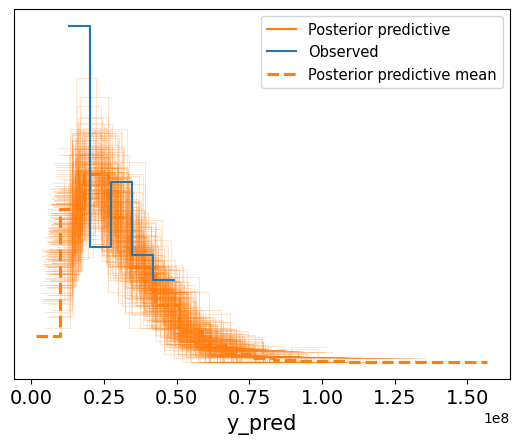

In [ ]:
az.plot_ppc(idata_bb2, num_pp_samples=200, colors=["C1", "C0", "C1"])

Text(0, 0.5, 'Salary')

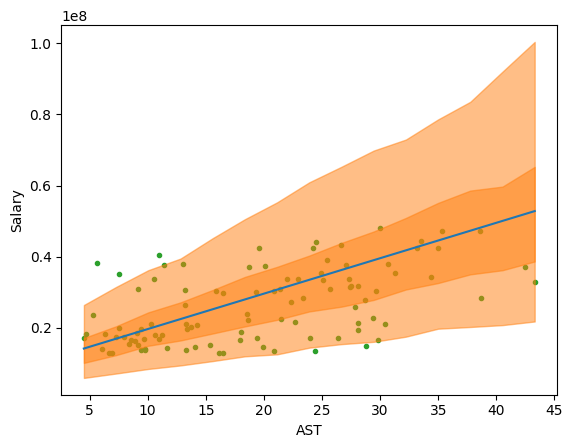

In [ ]:
#plots the posterior predictive distribution

#grabs the expected line, or line of best fit formula
mean_line = idata_bb2.posterior["μ"].mean(("chain", "draw"))

#creates some x values to run through our line formula
ASTs = np.random.normal(basketball.AST.values, 0.01)
idx = np.argsort(ASTs)
x = np.linspace(ASTs.min(), ASTs.max(), 15)

#grabs the 94% HDI and 50% HDI
y_pred_q = idata_bb2.posterior_predictive["y_pred"].quantile(
    [0.03, 0.97, 0.25, 0.75], dim=["chain", "draw"]
)
#sets up the HDIs for graphing
y_hat_bounds = iter(
    [
        PchipInterpolator(ASTs[idx], y_pred_q[i][idx])(x)
        for i in range(4)
    ]
)

#plots raw data and our line of best fit
_, ax = plt.subplots()
ax.plot(basketball.AST, basketball.Salary, "C2.", zorder=-3)
ax.plot(basketball.AST[idx], mean_line[idx], c="C0")


#graphs the 94% and 50% HDIs
for lb, ub in zip(y_hat_bounds, y_hat_bounds):
    ax.fill_between(x, lb, ub, color="C1", alpha=0.5)

#labels
ax.set_xlabel("AST")
ax.set_ylabel("Salary")

This model looks like it is the best we can get with the weak correlation we have, and I think I can say for certain that these things do not have any strong correlation. I think this may be because AST% for this season wouldn't really go into their current salary, so I would need to get stats for the season prior to when their salary was decided. I also think it might mess up the data that I am looking at the 100 most payed players in the NBA, and not all of them.